In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
# read in data
data = pd.read_csv('./raw_data/climbing_data.csv', index_col=0)
# drop duplicates
data = data.drop_duplicates()

## We want to investigate only world cups. Due to non consistent naming of events, we have to filter out all events that are not world cups.
# filter youth events
data = data[~data['name'].str.lower().str.contains('youth')]
# filter paraclimbing
data = data[~data['name'].str.lower().str.contains('para')]
# filter continental championships
data = data[~data['name'].str.lower().str.contains('continental')]
# filter pan american championships
data = data[~data['name'].str.lower().str.contains('pan')]
# filter asian championships
data = data[~data['name'].str.lower().str.contains('asia')]
# filter african championships
data = data[~data['name'].str.lower().str.contains('africa')]
# filter european championships
data = data[~data['name'].str.lower().str.contains('europe')]
# parse dates
data['starts_at'] = pd.to_datetime(data['starts_at'])
data['ends_at'] = pd.to_datetime(data['ends_at'])
data['season'] = data['starts_at'].dt.year
display(data.head())
display(data.shape)

,name,league_id,league_season_id,season_id,starts_at,ends_at,location,dcat_name,discipline_kind,category_name,rank,athlete_id,firstname,lastname,paraclimbing_sport_class,country,category_round_id,round_name,score,season
id,,,,,,,,,,,,,,,,,,,,
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,1.0,1364,Adam,ONDRA,NaN,CZE,469,Qualification,1.22,2020
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,1.0,1364,Adam,ONDRA,NaN,CZE,6136,Semi-Final,39+,2020
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,1.0,1364,Adam,ONDRA,NaN,CZE,6138,Final,TOP,2020
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,2.0,1129,Domen,SKOFIC,NaN,SLO,469,Qualification,9.5,2020
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,2.0,1129,Domen,SKOFIC,NaN,SLO,6136,Semi-Final,33+,2020


(48353, 20)

## How many different Boulder- and Climing cups are there?

In [17]:
lead = data[data['discipline_kind'] == 'lead']
boulder = data[data['discipline_kind'] == 'boulder']
print('lead unique cups {}, datapoints {}'.format(lead['name'].unique().shape, lead['name'].shape))
print('boulder unique cups {}, datapoints {}'.format(boulder['name'].unique().shape, boulder['name'].shape))
lead_cups = lead['name'].value_counts()
boulder_cups = boulder['name'].value_counts()
display(lead_cups)
display(boulder_cups)


lead unique cups (120,), datapoints (20231,)
boulder unique cups (105,), datapoints (18959,)


IFSC Climbing World Championships - Innsbruck (AUT) 2018    297
IFSC - Climbing World Cup (B,L) - Innsbruck (AUT) 2022      286
IFSC Climbing Worldcup (L, S) - Chamonix (FRA) 2019         282
IFSC Climbing Worldcup (L,S) - Chamonix (FRA) 2018          273
IFSC Climbing World Championships - Hachioji (JPN) 2019     258
                                                           ... 
IFSC Climbing Worldcup (L,S) - Wujiang (CHN) 2014            90
IFSC World Championship Lead Group A - Paris 2012            85
IFSC World Championship Lead Group B - Paris 2012            82
IFSC Climbing Worldcup (L) - Amman (JOR) 2011                77
IFSC Climbing Worldcup (L, S) - Xining (CHN) 2010            62
Name: name, Length: 120, dtype: int64

IFSC - Climbing World Cup (B,S) - Salt Lake City (USA) 2022    358
IFSC Climbing Worldcup (B) - Munich (GER) 2017                 332
IFSC Climbing World Championships - Innsbruck (AUT) 2018       314
IFSC - Climbing World Cup (B,L) - Innsbruck (AUT) 2022         285
IFSC Climbing Worldcup (B) - Munich (GER) 2018                 282
                                                              ... 
IFSC Climbing Worldcup (B) - Reunion (FRA) 2008                106
IFSC Climbing Worldcup (B,S) - Chongqing (CHN) 2013            102
IFSC Climbing Worldcup (B,S) - Chongqing (CHN) 2012            101
IFSC Climbing Worldcup (L, B, S) - Haiyang (CHN) 2014           98
IFSC Climbing Worldcup (B) - La Reunion (FRA) 2007              77
Name: name, Length: 105, dtype: int64

## How many climbing and boulder cups per year

<AxesSubplot: title={'center': 'Number of lead cups per year'}, xlabel='year', ylabel='number of cups'>

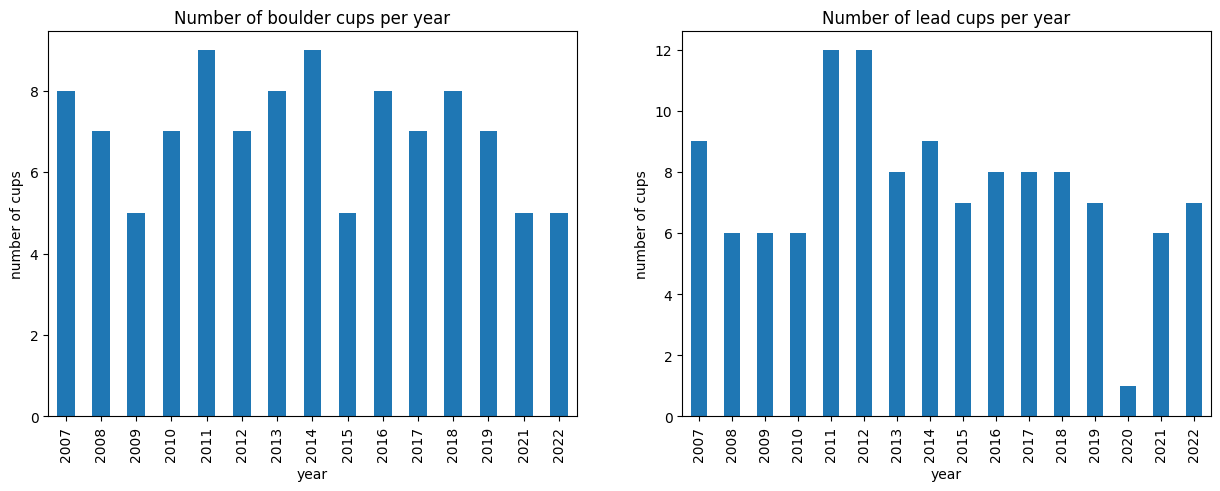

In [18]:
# count unique cups per year and group by year
bouldercups_per_year = boulder.groupby('season')['name'].nunique()
leadcups_per_year = lead.groupby('season')['name'].nunique()
# plot as bar chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
bouldercups_per_year.plot(kind='bar', title='Number of boulder cups per year', xlabel='year', ylabel='number of cups', ax=axes[0])
leadcups_per_year.plot(kind='bar', title='Number of lead cups per year', xlabel='year', ylabel='number of cups', ax=axes[1])

We can see that the number of cups in 2020 is much lower than in previous years. This is probably due to the corona pandemic. We will remove this year from our analysis.

In [19]:
# remove year 2020 
boulder = boulder[boulder['season'] != 2020]
lead = lead[lead['season'] != 2020]

## How often do athletes compete?

<AxesSubplot: title={'center': 'Number of attended lead cups per athlete'}, xlabel='athlete', ylabel='number of attended cups'>

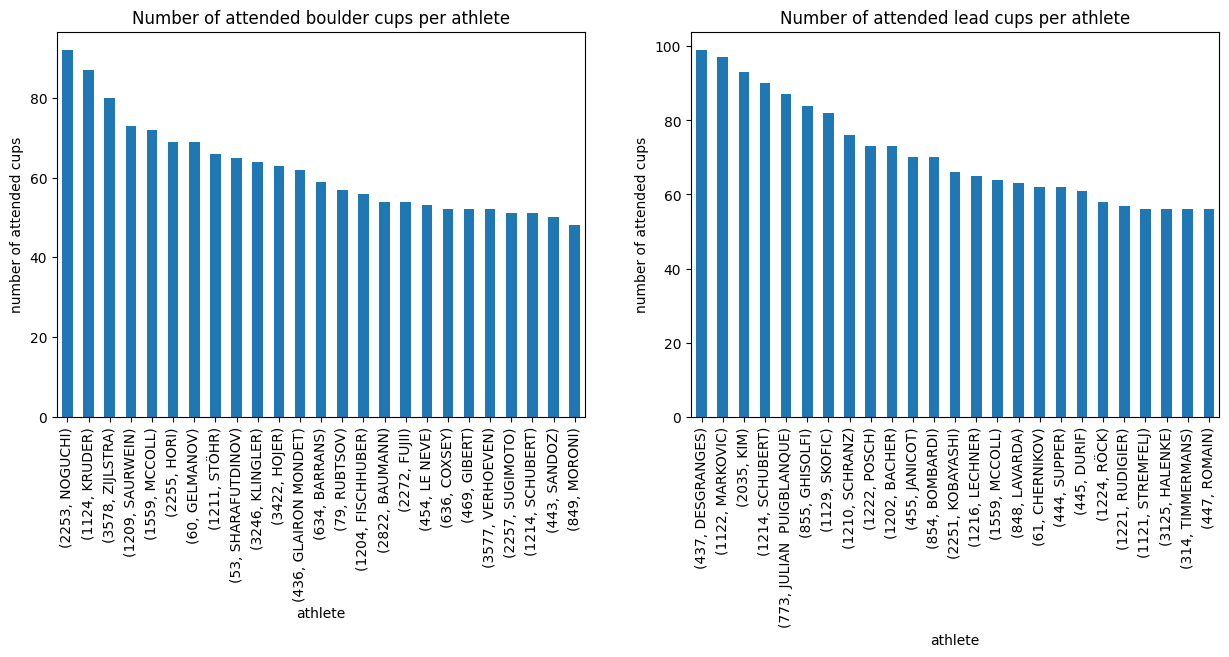

In [20]:
boulder_athletes = boulder.groupby(['athlete_id', 'lastname'])['name'].nunique().sort_values(ascending=False)
lead_athletes = lead.groupby(['athlete_id', 'lastname'])['name'].nunique().sort_values(ascending=False)
# plot as bar chart for top 25 athletes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
boulder_athletes.iloc[:25].plot(kind='bar', title='Number of attended boulder cups per athlete', xlabel='athlete', ylabel='number of attended cups', ax=axes[0])
lead_athletes.iloc[:25].plot(kind='bar', title='Number of attended lead cups per athlete', xlabel='athlete', ylabel='number of attended cups', ax=axes[1])

## Have a closer look to a specific cup in 2019

In [21]:
boulder_2019 = boulder[boulder['starts_at'].dt.year == 2019]
lead_2019 = lead[lead['starts_at'].dt.year == 2019]
boulder_athletes_2019 = boulder_2019.groupby(['athlete_id'])['name'].nunique().sort_values(ascending=False)
lead_athletes_2019 = lead_2019.groupby(['athlete_id'])['name'].nunique().sort_values(ascending=False)
boulder_number_of_cups_2019 = boulder_2019['name'].nunique()
lead_number_of_cups_2019 = lead_2019['name'].nunique()
# we concentrate on athletes that attended all cups - 1 
boulder_athletes_2019 = boulder_athletes_2019[boulder_athletes_2019 >= boulder_number_of_cups_2019 - 1]
lead_athletes_2019 = lead_athletes_2019[lead_athletes_2019 >= lead_number_of_cups_2019 - 1]

In [22]:
# filter cups for qualification
boulder_qualification = boulder_2019[boulder_2019['round_name'].str.contains('Qualification')]
# filter entries for our athletes
boulder_qualification = boulder_qualification[boulder_qualification['athlete_id'].isin(boulder_athletes_2019.index)]

In [23]:
boulder_qualification.groupby(['athlete_id', 'lastname'])['rank'].apply(list).reset_index()

,athlete_id,lastname,rank
0,89,SKORODUMOV,"[63.0, 53.0, 27.0, 13.0, 25.0, 20.0]"
1,144,KRASOVSKAIA,"[71.0, 47.0, 33.0, 41.0, 27.0, 23.0]"
2,147,MESHKOVA,"[33.0, 21.0, 41.0, 25.0, 16.0, 25.0]"
3,165,IARILOVETS,"[47.0, 13.0, 47.0, 29.0, 47.0, 61.0]"
4,314,TIMMERMANS,"[37.0, 107.0, 87.0, 49.0, 56.0, 79.0]"
...,...,...,...
63,3983,KHAZANOV,"[14.0, 20.0, 16.0, 23.0, 21.0, 35.0, 35.0]"
64,3991,LEVIN,"[33.0, 88.0, 39.0, 43.0, 67.0, 75.0]"
65,3998,MARCUS,"[51.0, 58.0, 55.0, 53.0, 61.0, 27.0]"
66,4328,BESTVATER,"[49.0, 39.0, 25.0, 31.0, 27.0, 16.0]"


## Create final dataframe for all years

In [24]:
# boulder qualification
final_boulder = pd.DataFrame() 
for year in boulder['season'].unique():
    boulder_year = boulder[(boulder['season'] == year) & (boulder['round_name'] == 'Qualification')]
    boulder_number_of_cups = boulder_year['name'].nunique()
    boulder_athletes = boulder_year.groupby(['athlete_id'])['name'].nunique().sort_values(ascending=False)
    boulder_athletes = boulder_athletes[boulder_athletes >= boulder_number_of_cups - 1]
    boulder_year = boulder_year[boulder_year['athlete_id'].isin(boulder_athletes.index)]
    boulder_year = boulder_year.groupby(['athlete_id', 'lastname', 'season'])['rank'].apply(list).reset_index()
    final_boulder = pd.concat([final_boulder, boulder_year])

In [25]:
# lead qualification
final_lead = pd.DataFrame()
for year in lead['season'].unique():
    lead_year = lead[(lead['season'] == year) & (lead['round_name'] == 'Qualification')]
    lead_number_of_cups = lead_year['name'].nunique()
    lead_athletes = lead_year.groupby(['athlete_id'])['name'].nunique().sort_values(ascending=False)
    lead_athletes = lead_athletes[lead_athletes >= lead_number_of_cups - 1]
    lead_year = lead_year[lead_year['athlete_id'].isin(lead_athletes.index)]
    lead_year = lead_year.groupby(['athlete_id', 'lastname', 'season'])['rank'].apply(list).reset_index()
    final_lead = pd.concat([final_lead, lead_year])

In [26]:
## do some calculations
final_boulder['mean'] = final_boulder['rank'].apply(lambda x: np.mean(x))
final_boulder['var'] = final_boulder['rank'].apply(lambda x: np.var(x))
final_boulder['std'] = final_boulder['rank'].apply(lambda x: np.std(x))
final_boulder['min'] = final_boulder['rank'].apply(lambda x: np.min(x))
final_boulder['max'] = final_boulder['rank'].apply(lambda x: np.max(x))
final_boulder['median'] = final_boulder['rank'].apply(lambda x: np.median(x))
final_boulder['sum'] = final_boulder['rank'].apply(lambda x: np.sum(x))

final_lead['mean'] = final_lead['rank'].apply(lambda x: np.mean(x))
final_lead['var'] = final_lead['rank'].apply(lambda x: np.var(x))
final_lead['std'] = final_lead['rank'].apply(lambda x: np.std(x))
final_lead['min'] = final_lead['rank'].apply(lambda x: np.min(x))
final_lead['max'] = final_lead['rank'].apply(lambda x: np.max(x))
final_lead['median'] = final_lead['rank'].apply(lambda x: np.median(x))
final_lead['sum'] = final_lead['rank'].apply(lambda x: np.sum(x))

## Have a look at one athlete

In [27]:
kruder = final_boulder[final_boulder['lastname'] == 'KRUDER']
kruder

,athlete_id,lastname,season,rank,mean,var,std,min,max,median,sum
13,1124,KRUDER,2010,"[25.0, 13.0, 4.0, 10.0, 21.0, 27.0, 64.0]",23.428571,333.387755,18.258909,4.0,64.0,21.0,164.0
4,1124,KRUDER,2011,"[45.0, 15.0, 4.0, 21.0, 23.0, 27.0, 21.0, 27.0...",25.111111,145.432099,12.059523,4.0,45.0,23.0,226.0
9,1124,KRUDER,2012,"[14.0, 12.0, 12.0, 21.0, 25.0, 9.0, 31.0]",17.714286,56.489796,7.515969,9.0,31.0,14.0,124.0
8,1124,KRUDER,2013,"[10.0, 32.0, 6.0, 11.0, 29.0, 11.0, 7.0, 13.0]",14.875000,86.359375,9.292974,6.0,32.0,11.0,119.0
8,1124,KRUDER,2014,"[13.0, 16.0, 6.0, 7.0, 9.0, 15.0, 10.0, 2.0]",9.750000,19.937500,4.465143,2.0,16.0,9.5,78.0
10,1124,KRUDER,2015,"[11.0, 18.0, 27.0, 22.0, 21.0]",19.800000,27.760000,5.268776,11.0,27.0,21.0,99.0
11,1137,KRUDER,2015,"[10.0, 10.0, 14.0, 12.0, 12.0]",11.600000,2.240000,1.496663,10.0,14.0,12.0,58.0
11,1124,KRUDER,2016,"[14.0, 8.0, 12.0, 15.0, 14.0, 11.0, 28.0, 11.0]",14.125000,31.859375,5.644411,8.0,28.0,13.0,113.0
5,1124,KRUDER,2017,"[5.0, 39.0, 3.0, 23.0, 8.0, 9.0, 29.0]",16.571429,163.959184,12.804655,3.0,39.0,9.0,116.0
13,1124,KRUDER,2018,"[1.0, 2.0, 6.0, 2.0, 8.0, 4.0, 2.0, 8.0]",4.125000,7.109375,2.666341,1.0,8.0,3.0,33.0


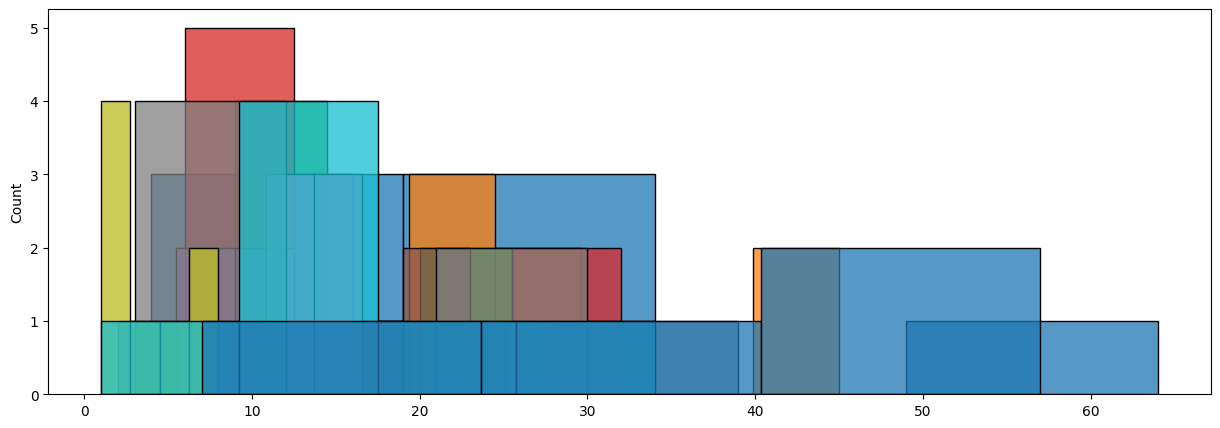

In [28]:
import seaborn as sns
# plot distribution of ranks
fig, ax = plt.subplots(figsize=(15, 5))
for season in kruder['season'].unique():
    kruder_season = kruder[kruder['season'] == season]
    sns.histplot(kruder_season['rank'].values[0],  label=season, ax=ax, element='bars', legend=True)

In [29]:
print(f"Mean variance of boulder athlete ranks: {final_boulder['var'].mean()}")
print(f"Mean variance of lead athlete ranks: {final_lead['var'].mean()}")

Mean variance of boulder athlete ranks: 110.9661250717481
Mean variance of lead athlete ranks: 69.04051943823794


In [30]:
final_lead

,athlete_id,lastname,season,rank,mean,var,std,min,max,median,sum
0,58,CHERESHNEVA,2007,"[20.0, 17.0, 3.0, 8.0, 25.0, 17.0, 13.0, 10.0]",14.125000,43.609375,6.603739,3.0,25.0,15.0,113.0
1,306,SARKANY,2007,"[2.0, 9.0, 2.0, 4.0, 2.0, 5.0, 8.0, 4.0, 8.0]",4.888889,6.987654,2.643417,2.0,9.0,4.0,44.0
2,426,MILLET,2007,"[13.0, 5.0, 4.0, 4.0, 12.0, 6.0, 13.0, 13.0]",8.750000,16.437500,4.054319,4.0,13.0,9.0,70.0
3,438,CIAVALDINI,2007,"[18.0, 5.0, 7.0, 24.0, 6.0, 9.0, 6.0, 4.0]",9.875000,45.359375,6.734937,4.0,24.0,6.5,79.0
4,445,DURIF,2007,"[8.0, 4.0, 12.0, 6.0, 10.0, 15.0, 5.0, 11.0, 5.0]",8.444444,12.691358,3.562493,4.0,15.0,8.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
42,11783,NAKAGAWA,2022,"[12.0, 7.0, 23.0, 8.0, 15.0, 7.0, 7.0]",11.285714,31.061224,5.573260,7.0,23.0,8.0,79.0
43,11832,YURIKUSA,2022,"[2.0, 8.0, 28.0, 26.0, 4.0, 1.0, 11.0]",11.428571,107.387755,10.362806,1.0,28.0,8.0,80.0
44,11847,BAUDRAND,2022,"[37.0, 51.0, 63.0, 22.0, 24.0, 15.0, 39.0]",35.857143,249.265306,15.788138,15.0,63.0,37.0,251.0
45,12324,DEMMEL,2022,"[28.0, 65.0, 52.0, 29.0, 43.0, 18.0, 23.0]",36.857143,249.551020,15.797184,18.0,65.0,29.0,258.0
